In [1]:
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create a file path
census_data = pd.read_csv("Resources/census_data_clean_14_22_medhousinc.csv")

# Read in the data. 
census_data.head()

,Owner_Occupied_Units,Owner_White_alone,Owner_Black_African_American_alone,Owner_American_Indian_Alaska_Native_alone,Owner_Asian_alone,Owner_Native_Hawaiian_Other_Pacific_Islander_alone,Owner_Some_other_race_alone,Owner_Two_or_more_races,Owner_White_no_Hispanic_or_Latino,Owner_Hispanic_Latino,...,Black_African_American,American_Indian_Alaska_Native,Asian,Native_Hawaiian_Other_Pacific_Islander,Other_Race,Two_More_Races,Count_Inds_Income_Past_12_Mos_<_Pov_Level,state,Zip_code,year
0,10,0,10,0,0,0,0,0,0,0,...,10,0,0,0,0,0,29,10.0,19717,2014
1,99,34,65,0,0,0,0,0,34,0,...,65,0,0,0,0,0,214,51.0,23401,2014
2,7,7,0,0,0,0,0,0,7,0,...,0,0,0,0,0,0,92,13.0,31084,2014
3,21,21,0,0,0,0,0,0,21,0,...,0,0,0,0,0,0,142,28.0,38731,2014
4,20,20,0,0,0,0,0,0,20,0,...,0,0,0,0,0,0,10,53.0,99144,2014


In [3]:
# Median household income over time
# Group by year and calculate the mean owner-occupancy rate for each year
median_household_income_by_year = census_data.groupby('year')['Median_Household_Income'].median()
median_household_income_by_year

year
2014    48303.0
2019    55833.0
2020    57857.0
2021    61429.0
2022    66993.0
Name: Median_Household_Income, dtype: float64

R-squared: 0.9078
Year: 2014, Trend Value: 47080.44
Year: 2019, Trend Value: 57659.82
Year: 2020, Trend Value: 59775.70
Year: 2021, Trend Value: 61891.58
Year: 2022, Trend Value: 64007.45


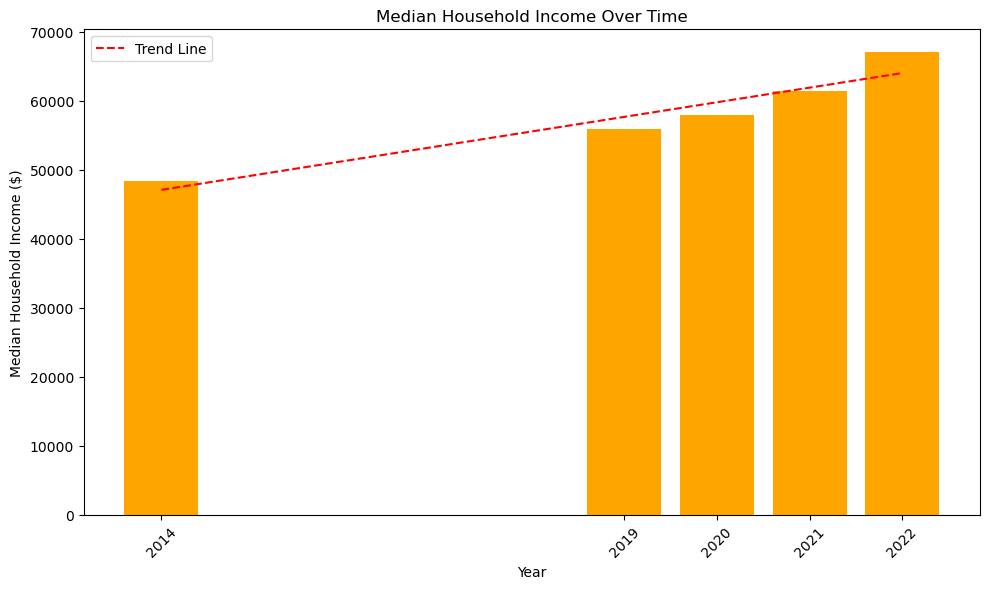

In [5]:
# Assuming median_household_income_by_year is already calculated
# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(median_household_income_by_year.index, median_household_income_by_year.values, color='orange')

# Fit a regression line
x = median_household_income_by_year.index
y = median_household_income_by_year.values
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
trendline = polynomial(x)

# Plot the regression line
plt.plot(x, trendline, color='red', linestyle='--', label='Trend Line')

# Calculate R-squared value
y_pred = trendline
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)
print(f"R-squared: {r_squared:.4f}")

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Median Household Income ($)')
plt.title('Median Household Income Over Time')
plt.xticks(median_household_income_by_year.index, rotation=45)
plt.legend()

# Calculate and print the trendline values
for year, trend_value in zip(x, trendline):
    print(f"Year: {year}, Trend Value: {trend_value:.2f}")

# Ensure layout is tight and save the plot as a file
plt.tight_layout()
# plt.savefig('medianhousehold_income_over_time14_22.png', format='png', dpi=300)

# Show the plot
plt.show()